In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 40.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [2]:
import os
from ultralytics import YOLO
import torch
import yaml
from IPython.display import Image, display
import matplotlib.pyplot as plt
import cv2
import numpy as np

# GPU kontrolü
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
PyTorch version: 2.6.0+cu124
CUDA available: True
GPU: Tesla T4


In [3]:
dataset_path = "/content/drive/MyDrive/PneumoniaDetection"

In [4]:
dataset_path = "/content/drive/MyDrive/PneumoniaDetection"

print("Dataset klasör yapısı:")
for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 2 * (level + 1)
    for file in files:
        print(f"{subindent}{file}")

Dataset klasör yapısı:
PneumoniaDetection/
  data.yaml
  README.dataset.txt
  README.roboflow.txt
  train/
    labels.cache
    labels/
      person7_bacteria_24_jpeg.rf.4a8394e76279f9ddf946a2f4e447c366.txt
      IM-0207-0001_jpeg.rf.421b5d63942f8d565c1bb54427443422.txt
      IM-0158-0001_jpeg.rf.7adb50bdfcbc25034f939df92d3c0dce.txt
      person25_bacteria_113_jpeg.rf.89d51c55bde54827aa77c732b8cb8904.txt
      person24_bacteria_112_jpeg.rf.0edb6b7866f59cce69536ab52c6a7d27.txt
      IM-0115-0001_jpeg.rf.eebf33b6eea50885e2dd0df9c08b7e05.txt
      IM-0122-0001_jpeg.rf.2dcb6997810526bef86c158a36be4baf.txt
      IM-0216-0001_jpeg.rf.a0dd5910b4901a69ed3eea2a399dcdb7.txt
      person25_bacteria_115_jpeg.rf.3cd8bc9e5dc10fb9e97e79ede4a021f0.txt
      IM-0128-0001_jpeg.rf.d8b8b7290ad349f278ae239c77744216.txt
      person26_bacteria_124_jpeg.rf.9662b4c6c4b17d15e131a635efd10f85.txt
      person7_bacteria_28_jpeg.rf.7e837840ec280a836cee551f469f0911.txt
      person17_bacteria_56_jpeg.rf.990c5a00b3f

In [5]:
yaml_path = os.path.join(dataset_path, "/content/drive/MyDrive/PneumoniaDetection/data.yaml")

# Mevcut data.yaml dosyasını oku ve yolları güncelle
if os.path.exists(yaml_path):
    with open(yaml_path, 'r') as file:
        data_config = yaml.safe_load(file)

    # Relative path'leri absolute path'lere çevir
    data_config['train'] = os.path.join(dataset_path, 'train/images')
    data_config['val'] = os.path.join(dataset_path, 'valid/images')
    data_config['test'] = os.path.join(dataset_path, 'test/images')
    data_config['nc'] = 2  # Normal ve Pneumonia
    data_config['names'] = ['Normal', 'pneumonia']

    # Roboflow bilgilerini kaldır (eğitim için gerekli değil)
    if 'roboflow' in data_config:
        del data_config['roboflow']

    # Güncellenmiş data.yaml'ı kaydet
    with open(yaml_path, 'w') as file:
        yaml.dump(data_config, file, default_flow_style=False)

    print("Güncellenmiş data.yaml içeriği:")
    print(yaml.dump(data_config, default_flow_style=False))
else:
    print("data.yaml dosyası bulunamadı!")
    print("Lütfen veriset yolunu kontrol edin.")

Güncellenmiş data.yaml içeriği:
names:
- Normal
- pneumonia
nc: 2
test: /content/drive/MyDrive/PneumoniaDetection/test/images
train: /content/drive/MyDrive/PneumoniaDetection/train/images
val: /content/drive/MyDrive/PneumoniaDetection/valid/images



In [6]:
def count_images_and_labels(folder_path):
    if not os.path.exists(folder_path):
        return 0, 0

    images_path = os.path.join(folder_path, 'images') if 'images' not in folder_path else folder_path
    labels_path = os.path.join(folder_path, 'labels') if 'labels' not in folder_path else folder_path.replace('images', 'labels')

    img_count = len([f for f in os.listdir(images_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    lbl_count = len([f for f in os.listdir(labels_path) if f.lower().endswith('.txt')]) if os.path.exists(labels_path) else 0

    return img_count, lbl_count

# İstatistikleri hesapla
train_imgs, train_lbls = count_images_and_labels(os.path.join(dataset_path, 'train'))
val_imgs, val_lbls = count_images_and_labels(os.path.join(dataset_path, 'valid'))
test_imgs, test_lbls = count_images_and_labels(os.path.join(dataset_path, 'test'))

print("Veriset İstatistikleri:")
print(f"Train: {train_imgs} resim, {train_lbls} etiket")
print(f"Validation: {val_imgs} resim, {val_lbls} etiket")
print(f"Test: {test_imgs} resim, {test_lbls} etiket")
print(f"Toplam: {train_imgs + val_imgs + test_imgs} resim")

Veriset İstatistikleri:
Train: 118 resim, 118 etiket
Validation: 34 resim, 34 etiket
Test: 17 resim, 17 etiket
Toplam: 169 resim


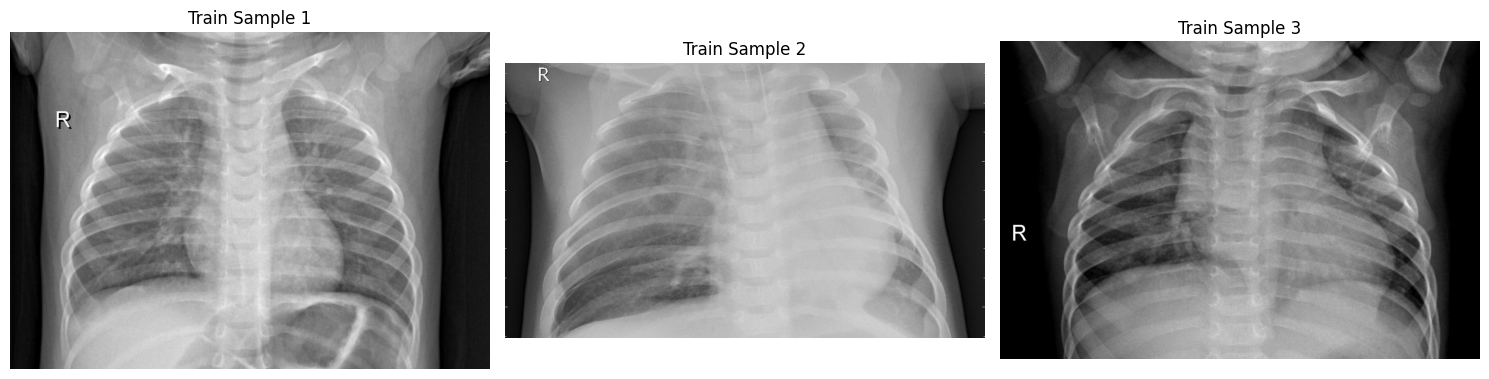

In [7]:
def display_sample_images(images_path, labels_path, num_samples=3):
    if not os.path.exists(images_path):
        print(f"Klasör bulunamadı: {images_path}")
        return

    image_files = [f for f in os.listdir(images_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))][:num_samples]

    fig, axes = plt.subplots(1, len(image_files), figsize=(15, 5))
    if len(image_files) == 1:
        axes = [axes]

    for i, img_file in enumerate(image_files):
        img_path = os.path.join(images_path, img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[i].imshow(img)
        axes[i].set_title(f"Train Sample {i+1}")
        axes[i].axis('off')

        # Etiket dosyasını kontrol et
        label_file = img_file.rsplit('.', 1)[0] + '.txt'
        label_path = os.path.join(labels_path, label_file)
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                labels = f.readlines()
            axes[i].set_xlabel(f"Annotations: {len(labels)}")

    plt.tight_layout()
    plt.show()

# Train klasöründen örnek resimleri göster
train_images_path = os.path.join(dataset_path, 'train/images')
train_labels_path = os.path.join(dataset_path, 'train/labels')

if os.path.exists(train_images_path):
    display_sample_images(train_images_path, train_labels_path, 3)

In [15]:
model = YOLO('yolov8s.pt')
print("YOLOv8x modeli yüklendi")

print(f"Model parametreleri: {sum(p.numel() for p in model.model.parameters()):,}")

100%|██████████| 21.5M/21.5M [00:00<00:00, 45.3MB/s]


YOLOv8x modeli yüklendi
Model parametreleri: 11,166,560


In [16]:
# Eğitim parametreleri
epochs = 100  # Epoch sayısı (ihtiyacınıza göre ayarlayın)
img_size = 640  # Resim boyutu
batch_size = 16  # Batch size (GPU kapasitesine göre ayarlayın)
patience = 20  # Early stopping patience

print("Eğitim başlıyor...")
print(f"Epochs: {epochs}")
print(f"Image size: {img_size}")
print(f"Batch size: {batch_size}")

# Eğitimi başlat
results = model.train(
    data=yaml_path,
    epochs=epochs,
    imgsz=img_size,
    batch=batch_size,
    patience=patience,
    save=True,
    project='pneumonia_detection',
    name='yolov8s_run',
    verbose=True,
    device=0 if torch.cuda.is_available() else 'cpu'
)

Eğitim başlıyor...
Epochs: 100
Image size: 640
Batch size: 16
Ultralytics 8.3.147 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/PneumoniaDetection/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s_run, nbs=64, nms=False, opset=None, optimize=False, optimizer=

train: Scanning /content/drive/MyDrive/PneumoniaDetection/train/labels.cache... 118 images, 0 backgrounds, 0 corrupt: 100%|██████████| 118/118 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.4±0.3 ms, read: 25.9±15.6 MB/s, size: 103.4 KB)


val: Scanning /content/drive/MyDrive/PneumoniaDetection/valid/labels.cache... 34 images, 0 backgrounds, 0 corrupt: 100%|██████████| 34/34 [00:00<?, ?it/s]


Plotting labels to pneumonia_detection/yolov8s_run/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to pneumonia_detection/yolov8s_run
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.15G      1.607      3.558       2.06         16        640: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all         34         34     0.0814      0.309      0.131     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.88G      1.365      2.684        1.8         18        640: 100%|██████████| 8/8 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         34         34      0.426      0.915      0.659      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.92G      1.075      1.634      1.511         19        640: 100%|██████████| 8/8 [00:02<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         34         34      0.392      0.843      0.588      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.96G      1.086      1.362      1.496         14        640: 100%|██████████| 8/8 [00:02<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         34         34       0.27      0.492      0.297      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.96G      1.068      1.291      1.449         16        640: 100%|██████████| 8/8 [00:02<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]

                   all         34         34      0.322      0.941      0.414      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.96G      1.059      1.123      1.448         16        640: 100%|██████████| 8/8 [00:02<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.77it/s]

                   all         34         34        0.8      0.794      0.844      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         5G      1.096      1.169      1.484         16        640: 100%|██████████| 8/8 [00:02<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]

                   all         34         34      0.345      0.521      0.442      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         5G      1.066      1.008      1.412         16        640: 100%|██████████| 8/8 [00:02<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         34         34      0.409      0.417      0.403      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         5G          1     0.9887      1.426         16        640: 100%|██████████| 8/8 [00:02<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         34         34      0.573      0.781      0.841       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         5G       1.08     0.9417      1.474         18        640: 100%|██████████| 8/8 [00:02<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         34         34      0.682      0.814      0.838      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         5G      1.091     0.9965      1.478         14        640: 100%|██████████| 8/8 [00:02<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.05it/s]

                   all         34         34      0.333      0.392      0.297      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.04G      1.167      1.024      1.539         13        640: 100%|██████████| 8/8 [00:02<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         34         34     0.0456       0.17     0.0301    0.00597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.04G      1.008     0.9416      1.443         15        640: 100%|██████████| 8/8 [00:02<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         34         34      0.235      0.346      0.268     0.0893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.04G      0.985     0.8709      1.369         15        640: 100%|██████████| 8/8 [00:02<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.42it/s]

                   all         34         34     0.0266      0.372     0.0178    0.00376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.07G      1.019     0.8564       1.39         16        640: 100%|██████████| 8/8 [00:02<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.78it/s]

                   all         34         34      0.383      0.608       0.32      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.07G      1.013     0.7668      1.371         20        640: 100%|██████████| 8/8 [00:02<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.66it/s]

                   all         34         34      0.384      0.378      0.418       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.07G      1.043     0.8558      1.466         10        640: 100%|██████████| 8/8 [00:02<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         34         34      0.649      0.611      0.692      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.07G      1.022     0.8411      1.397         17        640: 100%|██████████| 8/8 [00:02<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]

                   all         34         34      0.408      0.654      0.562      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.07G      1.028     0.7691        1.4         16        640: 100%|██████████| 8/8 [00:02<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]

                   all         34         34      0.597      0.309      0.443      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.07G     0.9168     0.7735      1.342         15        640: 100%|██████████| 8/8 [00:02<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]

                   all         34         34      0.692       0.74      0.809      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.07G     0.9544     0.7301      1.304         19        640: 100%|██████████| 8/8 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         34         34      0.645       0.72      0.771      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.07G      1.001     0.7701      1.388         14        640: 100%|██████████| 8/8 [00:02<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.69it/s]

                   all         34         34      0.799      0.715      0.843      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.07G     0.9656     0.7321      1.363         20        640: 100%|██████████| 8/8 [00:02<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]

                   all         34         34      0.846      0.833       0.93      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.07G     0.9821     0.7161      1.362         17        640: 100%|██████████| 8/8 [00:02<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.48it/s]

                   all         34         34      0.919      0.819      0.941      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.07G     0.9139     0.6869      1.339         17        640: 100%|██████████| 8/8 [00:02<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.88it/s]

                   all         34         34       0.96      0.972      0.983      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.07G     0.8545     0.6295       1.26         21        640: 100%|██████████| 8/8 [00:02<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         34         34      0.954      0.975      0.991      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.07G     0.8904      0.629      1.318         18        640: 100%|██████████| 8/8 [00:02<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.29it/s]

                   all         34         34      0.947      0.969      0.986      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       5.1G     0.9038     0.6529      1.357         10        640: 100%|██████████| 8/8 [00:01<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

                   all         34         34      0.908      0.793      0.933      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       5.1G     0.8966     0.6476       1.29         18        640: 100%|██████████| 8/8 [00:02<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]

                   all         34         34      0.913          1      0.991      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       5.1G     0.8628       0.62      1.259         22        640: 100%|██████████| 8/8 [00:02<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         34         34      0.764      0.785      0.861      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.13G     0.8544     0.6251      1.277         20        640: 100%|██████████| 8/8 [00:02<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.38it/s]

                   all         34         34       0.84      0.837       0.91      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.13G      0.875     0.6754      1.302         22        640: 100%|██████████| 8/8 [00:02<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         34         34      0.695      0.981      0.964      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.13G     0.8792     0.6563      1.315         16        640: 100%|██████████| 8/8 [00:02<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         34         34      0.984      0.911      0.962      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.17G     0.8873     0.6552      1.272         19        640: 100%|██████████| 8/8 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         34         34      0.968      0.938      0.987      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.17G     0.9407     0.7414      1.358         16        640: 100%|██████████| 8/8 [00:02<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]

                   all         34         34      0.894      0.925      0.989       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.17G     0.8141      0.611       1.26         18        640: 100%|██████████| 8/8 [00:02<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.12it/s]

                   all         34         34      0.985          1      0.995      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.17G     0.8612       0.62      1.277         14        640: 100%|██████████| 8/8 [00:02<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]

                   all         34         34      0.987          1      0.995      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.17G     0.8229     0.5944      1.225         15        640: 100%|██████████| 8/8 [00:02<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         34         34      0.961      0.981      0.988      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.17G       0.84     0.6286      1.288         16        640: 100%|██████████| 8/8 [00:02<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]


                   all         34         34      0.987          1      0.995      0.806

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.17G     0.8329     0.5822      1.246         14        640: 100%|██████████| 8/8 [00:02<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.06it/s]

                   all         34         34      0.976      0.994      0.995      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.17G     0.7931     0.5967      1.226         20        640: 100%|██████████| 8/8 [00:02<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.91it/s]

                   all         34         34      0.981          1      0.995      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.17G     0.7961     0.5531      1.233         13        640: 100%|██████████| 8/8 [00:02<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]

                   all         34         34      0.947          1      0.995      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.17G     0.8031     0.5797      1.236         14        640: 100%|██████████| 8/8 [00:02<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]


                   all         34         34      0.927      0.968      0.986      0.782

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.17G     0.8356      0.595      1.252         20        640: 100%|██████████| 8/8 [00:02<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]

                   all         34         34       0.96      0.974      0.995      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.17G     0.8853     0.6274       1.31         11        640: 100%|██████████| 8/8 [00:02<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.96it/s]

                   all         34         34      0.996          1      0.995      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.17G     0.8337      0.547      1.276         17        640: 100%|██████████| 8/8 [00:02<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.78it/s]

                   all         34         34      0.971      0.975      0.995      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.17G      0.872     0.5687      1.281         15        640: 100%|██████████| 8/8 [00:02<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all         34         34      0.993          1      0.995      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.17G     0.7881     0.5636      1.256         19        640: 100%|██████████| 8/8 [00:02<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.81it/s]

                   all         34         34       0.96          1      0.995      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.17G     0.8331     0.5523      1.284         17        640: 100%|██████████| 8/8 [00:02<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all         34         34      0.967      0.974      0.995      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.17G     0.7392     0.5021      1.218         12        640: 100%|██████████| 8/8 [00:02<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.60it/s]

                   all         34         34       0.97      0.973      0.995      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.17G     0.7478     0.5016       1.19         19        640: 100%|██████████| 8/8 [00:02<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.98it/s]

                   all         34         34      0.935          1      0.994      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.17G     0.7592     0.5233      1.214         19        640: 100%|██████████| 8/8 [00:02<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         34         34       0.93      0.997      0.995      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.17G     0.7857     0.5813      1.223         20        640: 100%|██████████| 8/8 [00:02<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.73it/s]

                   all         34         34      0.965      0.995      0.994       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.17G     0.8122     0.5672       1.23         18        640: 100%|██████████| 8/8 [00:02<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]

                   all         34         34      0.866      0.952      0.994      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.17G     0.7649     0.5282      1.218         21        640: 100%|██████████| 8/8 [00:02<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.73it/s]

                   all         34         34      0.991          1      0.995      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.17G     0.7658     0.5359       1.26         20        640: 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         34         34      0.992          1      0.995      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.17G     0.7224     0.5103      1.234         12        640: 100%|██████████| 8/8 [00:02<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]

                   all         34         34      0.991          1      0.995      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.17G        0.7     0.4576      1.132         16        640: 100%|██████████| 8/8 [00:02<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.83it/s]

                   all         34         34      0.956          1      0.994       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.17G     0.8005     0.5223      1.263         15        640: 100%|██████████| 8/8 [00:02<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]

                   all         34         34      0.951      0.997      0.995      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.17G     0.7385     0.5059      1.196         19        640: 100%|██████████| 8/8 [00:02<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         34         34      0.951      0.998      0.995      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.17G     0.7604     0.5006      1.224         11        640: 100%|██████████| 8/8 [00:02<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         34         34      0.992          1      0.995      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.17G      0.748      0.486       1.21         17        640: 100%|██████████| 8/8 [00:02<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.07it/s]

                   all         34         34       0.95      0.969      0.993      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.17G     0.7171     0.4787      1.154         19        640: 100%|██████████| 8/8 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]

                   all         34         34      0.989          1      0.995      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.17G     0.6919     0.4755      1.154         19        640: 100%|██████████| 8/8 [00:02<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]

                   all         34         34      0.989          1      0.995      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.17G     0.6556     0.4905      1.147         16        640: 100%|██████████| 8/8 [00:02<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         34         34      0.952      0.996      0.995      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.17G     0.6446     0.4557      1.125         18        640: 100%|██████████| 8/8 [00:02<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.08it/s]

                   all         34         34      0.952      0.989      0.995      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.17G      0.637       0.44      1.146         16        640: 100%|██████████| 8/8 [00:02<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.28it/s]

                   all         34         34      0.992      0.973      0.995      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.17G     0.7002     0.4606      1.181         14        640: 100%|██████████| 8/8 [00:02<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]

                   all         34         34      0.995      0.995      0.995       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.17G     0.6476     0.4371      1.147         18        640: 100%|██████████| 8/8 [00:02<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         34         34      0.988      0.996      0.995      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.17G     0.7115     0.4385      1.176         15        640: 100%|██████████| 8/8 [00:02<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.38it/s]

                   all         34         34      0.994          1      0.995       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.17G     0.6299     0.4279      1.118         15        640: 100%|██████████| 8/8 [00:02<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.92it/s]

                   all         34         34      0.989          1      0.995      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.17G      0.638     0.4098      1.137         16        640: 100%|██████████| 8/8 [00:02<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.09it/s]

                   all         34         34      0.995          1      0.995       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.17G     0.6136     0.4134      1.124         15        640: 100%|██████████| 8/8 [00:02<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.05it/s]

                   all         34         34      0.949      0.997      0.995      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.17G     0.6569     0.4287      1.155         21        640: 100%|██████████| 8/8 [00:02<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         34         34      0.946      0.997      0.995      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.17G     0.6533     0.4791      1.155         16        640: 100%|██████████| 8/8 [00:02<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]

                   all         34         34      0.985          1      0.995      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.21G     0.6433     0.4632      1.129         17        640: 100%|██████████| 8/8 [00:02<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]

                   all         34         34      0.969      0.942      0.993      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      5.21G     0.6216     0.4127      1.121         12        640: 100%|██████████| 8/8 [00:02<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.45it/s]

                   all         34         34       0.99          1      0.995      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.21G     0.6087     0.4062      1.104         15        640: 100%|██████████| 8/8 [00:02<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         34         34      0.996          1      0.995      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.21G     0.6596     0.3909      1.152         17        640: 100%|██████████| 8/8 [00:02<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.69it/s]

                   all         34         34      0.985      0.998      0.995      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.21G     0.6054     0.4266      1.125         15        640: 100%|██████████| 8/8 [00:02<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.81it/s]

                   all         34         34      0.968      0.998      0.995      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.21G      0.572     0.4017       1.09         21        640: 100%|██████████| 8/8 [00:02<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]

                   all         34         34      0.991          1      0.995      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      5.21G     0.5923     0.4082      1.119         13        640: 100%|██████████| 8/8 [00:02<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]

                   all         34         34      0.995          1      0.995      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      5.21G     0.5644     0.3841      1.084         18        640: 100%|██████████| 8/8 [00:02<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         34         34      0.996          1      0.995      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      5.21G      0.569     0.3779      1.085         17        640: 100%|██████████| 8/8 [00:02<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         34         34      0.994          1      0.995      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.21G     0.5552     0.3703      1.057         21        640: 100%|██████████| 8/8 [00:02<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.99it/s]

                   all         34         34      0.991          1      0.995      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      5.21G     0.5906     0.4303      1.106         14        640: 100%|██████████| 8/8 [00:01<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.67it/s]

                   all         34         34       0.99          1      0.995      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.21G     0.5547     0.3712      1.072         19        640: 100%|██████████| 8/8 [00:02<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all         34         34      0.992          1      0.995      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      5.21G     0.5754     0.3733      1.083         16        640: 100%|██████████| 8/8 [00:02<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all         34         34      0.996          1      0.995      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.21G     0.5361     0.3725      1.036         17        640: 100%|██████████| 8/8 [00:02<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]

                   all         34         34      0.995          1      0.995      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.21G     0.5382     0.3557      1.067         20        640: 100%|██████████| 8/8 [00:02<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]

                   all         34         34      0.995          1      0.995      0.818


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      5.21G     0.5267     0.4553      1.148          6        640: 100%|██████████| 8/8 [00:06<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         34         34      0.994          1      0.995      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      5.21G     0.4896     0.3813      1.103          6        640: 100%|██████████| 8/8 [00:02<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]

                   all         34         34      0.994          1      0.995      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      5.21G       0.46      0.311      1.099          6        640: 100%|██████████| 8/8 [00:02<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]

                   all         34         34      0.995          1      0.995      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      5.21G     0.4586     0.3056      1.058          6        640: 100%|██████████| 8/8 [00:02<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         34         34      0.995          1      0.995      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.21G     0.4699     0.3242      1.133          6        640: 100%|██████████| 8/8 [00:02<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         34         34      0.995          1      0.995      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      5.21G     0.4492     0.3314      1.093          6        640: 100%|██████████| 8/8 [00:02<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]

                   all         34         34      0.996          1      0.995      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.21G     0.4504     0.2755      1.058          6        640: 100%|██████████| 8/8 [00:01<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]

                   all         34         34      0.996          1      0.995      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      5.21G     0.4312     0.2747      1.061          6        640: 100%|██████████| 8/8 [00:02<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]

                   all         34         34      0.996          1      0.995      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      5.21G     0.4563     0.2937      1.055          6        640: 100%|██████████| 8/8 [00:02<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         34         34      0.996          1      0.995      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.21G      0.437     0.2692      1.061          6        640: 100%|██████████| 8/8 [00:02<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]

                   all         34         34      0.996          1      0.995      0.809



100 epochs completed in 0.095 hours.
Optimizer stripped from pneumonia_detection/yolov8s_run/weights/last.pt, 22.5MB
Optimizer stripped from pneumonia_detection/yolov8s_run/weights/best.pt, 22.5MB

Validating pneumonia_detection/yolov8s_run/weights/best.pt...
Ultralytics 8.3.147 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]


                   all         34         34      0.995          1      0.995      0.821
                Normal         16         16      0.993          1      0.995      0.889
             pneumonia         18         18      0.997          1      0.995      0.754
Speed: 0.2ms preprocess, 5.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to pneumonia_detection/yolov8s_run


In [17]:
# Eğitim grafikleri
results_path = 'pneumonia_detection/yolov8x_run'

# Results.png dosyasını göster
if os.path.exists(f'{results_path}/results.png'):
    display(Image(f'{results_path}/results.png'))

# Confusion matrix
if os.path.exists(f'{results_path}/confusion_matrix.png'):
    display(Image(f'{results_path}/confusion_matrix.png'))

In [18]:
print("Validation başlıyor...")
val_results = model.val(
    data=yaml_path,
    imgsz=img_size,
    batch=batch_size,
    device=0 if torch.cuda.is_available() else 'cpu'
)

print("Validation Sonuçları:")
print(f"mAP50: {val_results.box.map50:.4f}")
print(f"mAP50-95: {val_results.box.map:.4f}")
print(f"Precision: {val_results.box.mp:.4f}")
print(f"Recall: {val_results.box.mr:.4f}")

Validation başlıyor...
Ultralytics 8.3.147 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 47.2±21.7 MB/s, size: 108.2 KB)


val: Scanning /content/drive/MyDrive/PneumoniaDetection/valid/labels.cache... 34 images, 0 backgrounds, 0 corrupt: 100%|██████████| 34/34 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]


                   all         34         34      0.995          1      0.995      0.829
                Normal         16         16      0.993          1      0.995      0.889
             pneumonia         18         18      0.997          1      0.995      0.769
Speed: 8.9ms preprocess, 15.6ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to pneumonia_detection/yolov8s_run2
Validation Sonuçları:
mAP50: 0.9950
mAP50-95: 0.8291
Precision: 0.9950
Recall: 1.0000


In [19]:
if test_imgs > 0:
    test_images_path = os.path.join(dataset_path, 'test/images')
    test_results = model.predict(
        source=test_images_path,
        imgsz=img_size,
        conf=0.25,  # Confidence threshold
        save=True,
        project='pneumonia_detection',
        name='test_predictions'
    )
    print(f"Test tahminleri tamamlandı. {len(test_results)} resim işlendi.")


image 1/17 /content/drive/MyDrive/PneumoniaDetection/test/images/IM-0117-0001-Copy_jpeg.rf.23585894a36bbda7400127ba37f5f6ca.jpg: 544x640 1 Normal, 40.4ms
image 2/17 /content/drive/MyDrive/PneumoniaDetection/test/images/IM-0127-0001_jpeg.rf.5562c1684882612a5d511159e57789a3.jpg: 448x640 1 Normal, 42.5ms
image 3/17 /content/drive/MyDrive/PneumoniaDetection/test/images/IM-0154-0001_jpeg.rf.f2e366706064d674a55ec3f6a369ec19.jpg: 512x640 1 Normal, 42.1ms
image 4/17 /content/drive/MyDrive/PneumoniaDetection/test/images/IM-0189-0001_jpeg.rf.2654e3388732033c92fca462c2ed4cf2.jpg: 512x640 1 Normal, 13.2ms
image 5/17 /content/drive/MyDrive/PneumoniaDetection/test/images/IM-0199-0001_jpeg.rf.744e8b9e003b30604846f83ca77788d1.jpg: 384x640 1 Normal, 66.5ms
image 6/17 /content/drive/MyDrive/PneumoniaDetection/test/images/IM-0227-0001_jpeg.rf.76e9346c986e4a05703250c0c76b5751.jpg: 576x640 1 Normal, 42.8ms
image 7/17 /content/drive/MyDrive/PneumoniaDetection/test/images/person12_bacteria_46_jpeg.rf.e651bf


image 1/1 /content/drive/MyDrive/PneumoniaDetection/test/images/person24_bacteria_108_jpeg.rf.9b3672c6d9c98657c5048aa0c900b6b9.jpg: 448x640 1 pneumonia, 14.7ms
Speed: 4.3ms preprocess, 14.7ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/drive/MyDrive/PneumoniaDetection/test/images/person21_bacteria_73_jpeg.rf.b3185c9b09a0c781e23d99ed3f0b7869.jpg: 576x640 1 pneumonia, 16.6ms
Speed: 3.1ms preprocess, 16.6ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 640)

image 1/1 /content/drive/MyDrive/PneumoniaDetection/test/images/person3_bacteria_11_jpeg.rf.b1f8caae679fcaf6220131f9f76306d6.jpg: 512x640 1 pneumonia, 14.0ms
Speed: 2.8ms preprocess, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 512, 640)


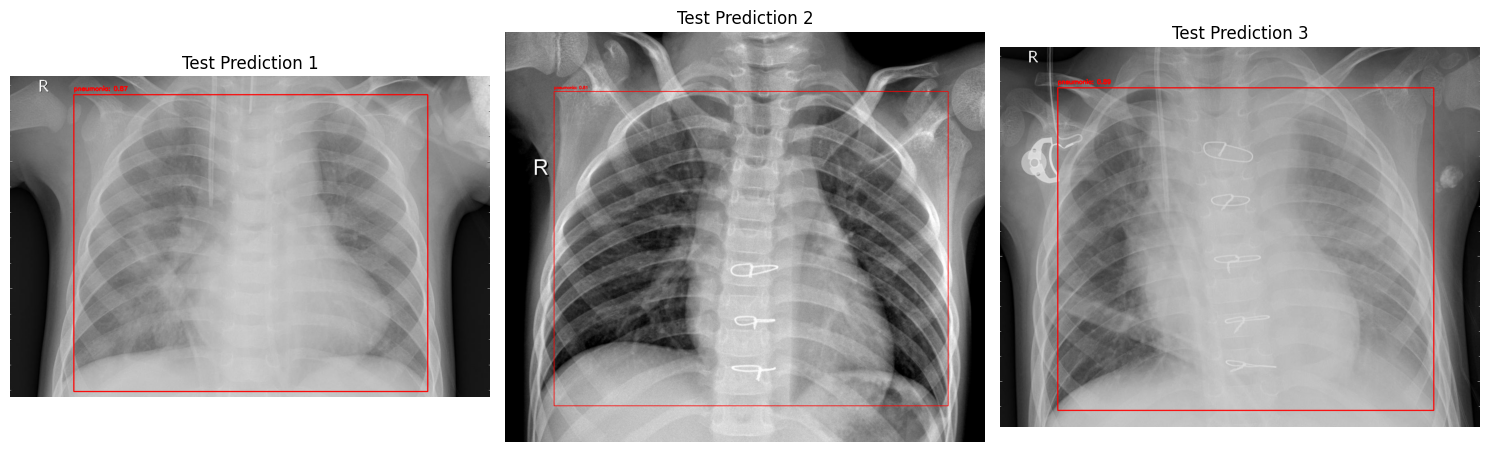

In [20]:
def show_predictions(image_path, model, conf_threshold=0.25):
    # Tahmin yap
    results = model.predict(source=image_path, conf=conf_threshold, save=False)

    # Orijinal resmi yükle
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Tahminleri çiz
    for result in results:
        boxes = result.boxes
        if boxes is not None:
            for box in boxes:
                # Bounding box koordinatları
                x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
                conf = box.conf[0].cpu().numpy()

                # Dikdörtgen çiz
                cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)

                # Confidence skorunu ve sınıfı yaz
                class_names = ['Normal', 'pneumonia']
                class_id = int(box.cls[0].cpu().numpy())
                label = f'{class_names[class_id]}: {conf:.2f}'
                cv2.putText(img, label, (int(x1), int(y1)-10),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    return img

# Test klasöründen örnek tahminler göster
if test_imgs > 0:
    test_image_files = [f for f in os.listdir(test_images_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))][:3]

    fig, axes = plt.subplots(1, len(test_image_files), figsize=(15, 5))
    if len(test_image_files) == 1:
        axes = [axes]

    for i, img_file in enumerate(test_image_files):
        img_path = os.path.join(test_images_path, img_file)
        pred_img = show_predictions(img_path, model)

        axes[i].imshow(pred_img)
        axes[i].set_title(f"Test Prediction {i+1}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

In [21]:
best_model_path = f'{results_path}/weights/best.pt'
if os.path.exists(best_model_path):
    # ONNX formatına export et
    model.export(format='onnx', imgsz=img_size)
    print("Model ONNX formatına export edildi")

    # Model dosyasını Drive'a kopyala
    import shutil
    drive_model_path = "/content/drive/MyDrive/pneumonia_yolov8x_best.pt"
    shutil.copy(best_model_path, drive_model_path)
    print(f"Model Drive'a kaydedildi: {drive_model_path}")

print("Eğitim ve değerlendirme tamamlandı!")

# HÜCRE 15: Yeni resim üzerinde tahmin yap (isteğe bağlı)
def predict_new_image(image_path, model_path=None):
    """Yeni bir resim üzerinde Normal/Pneumonia tahmini yap"""
    if model_path:
        model = YOLO(model_path)

    results = model.predict(source=image_path, conf=0.25, save=True)

    # Sonuçları göster
    class_names = ['Normal', 'pneumonia']
    for result in results:
        result.show()
        boxes = result.boxes
        if boxes is not None:
            print(f"Tespit edilen obje sayısı: {len(boxes)}")
            for i, box in enumerate(boxes):
                conf = box.conf[0].cpu().numpy()
                class_id = int(box.cls[0].cpu().numpy())
                print(f"Tespit {i+1}: {class_names[class_id]} - Confidence = {conf:.3f}")
        else:
            print("Hiçbir obje tespit edilmedi")

Eğitim ve değerlendirme tamamlandı!
